In [2]:
# data processing and network processing 
import pandas as pd
import networkx as nx

# plotting
import matplotlib
import matplotlib.pyplot as plt

# role extraction
from graphrole import RecursiveFeatureExtractor, RoleExtractor

# extras
import numpy as np
import seaborn as sns
import warnings
from pprint import pprint

In [3]:
# load the dataset
data = pd.read_csv('twitter_data.csv')

In [4]:
def create_directed_graph(data):
    g = nx.from_pandas_edgelist(data, source='lower',
                                target='lower-2',
                                create_using=nx.DiGraph())

    print('graph information:', nx.info(g))
    print('checking data:', data.shape)

    # check first few columns of data frame
    print('checking first few columns of dataframe:')
    print(data.head())
    return g

In [5]:
g = create_directed_graph(data)

graph information: Name: 
Type: DiGraph
Number of nodes: 42092
Number of edges: 182221
Average in degree:   4.3291
Average out degree:   4.3291
checking data: (481727, 2)
checking first few columns of dataframe:
             lower       lower-2
0         djanecek    ohneklippo
1  lindenschmidafd  dieter_stein
2         kleikert        hhirte
3         kleikert      cducsubt
4   tobias_schulze    herr_berrt


In [6]:
g

### Role Discovery

### Checking Roles to determine Characteristics

In [40]:
# create subgraph (egograph) of specific node
x = ''
def create_subgraph():
    
    # user gives twitter handle as input, egograph/subgraph of the input is created
    x = input()
    f = nx.ego_graph(g, x, undirected=True)
    
    # print information of graph
    print(nx.info(f))
    
    # plot created subgraphh
    nx.draw_networkx(f, with_labels=False, node_size=200, width=2.0,
                     node_color = ['red' if node == x else 'teal' for node in f],
                     pos=nx.circular_layout(f))
    
    
    return f

aniebler
Name: 
Type: DiGraph
Number of nodes: 25
Number of edges: 150
Average in degree:   6.0000
Average out degree:   6.0000


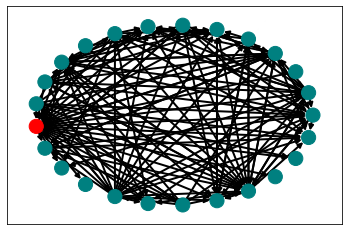

In [41]:
# role_0
a = create_subgraph()

# no outgoing edges, user is only mentioned by others and not active themselves
# k_out = 0

In [ ]:
# role_1
b = create_subgraph()

# neighbours mostly role_2, connected to stars

BetMueller
Name: 
Type: DiGraph
Number of nodes: 16
Number of edges: 43
Average in degree:   2.6875
Average out degree:   2.6875
['CerstinGammelin', 'BetMueller', 'vorwaerts', 'OlafScholz', 'Kajo2009', 'hubertus_heil', 'aziz_b', 'FloMotionMS', 'larsklingbeil', 'SZ', 'SvenjaSchulze68', 'NancyFaeser', 'spdde', 'UliGroetsch', 'NowaboFM', 'Timon_Gremmels']


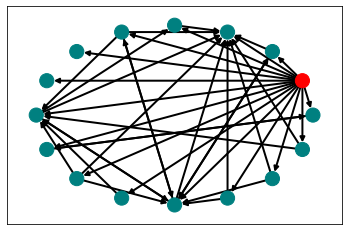

In [18]:
# role_2
c = create_subgraph()

# nodes seems to be center of star (not using circular layout to plot)

pippilia
Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667
['Karl_Lauterbach', 'pippilia', 'ArminLaschet']


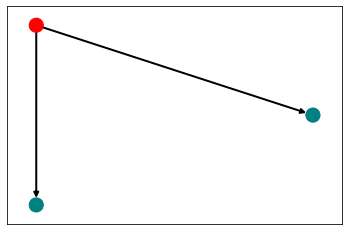

In [12]:
# role_3
d = create_subgraph()

# no ingoing edges, user is never mentioned by others 
# k_in = 0, node seems to bridge cliques and stars

groehe
Name: 
Type: DiGraph
Number of nodes: 13
Number of edges: 33
Average in degree:   2.5385
Average out degree:   2.5385
['Hallaschka_HH', 'HansJosefBracht', 'bodoloettgen', 'OlafScholz', 'ArminLaschet', 'Roger_Saha', 'AWidmannMauz', 'schulzeeuropa', 'NikolausBlome', 'groehe', 'TrolesHeike', 'SerapGueler', 'PatriciaPeill']


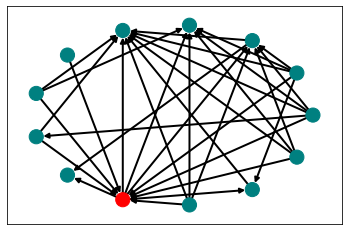

In [19]:
# role_4
e = create_subgraph()

# possibly star-edge?
# connected to many role_2, part of stars

menschia
Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 3
Average in degree:   1.0000
Average out degree:   1.0000
['menschia', 'Karl_Lauterbach', 'aus_coe']


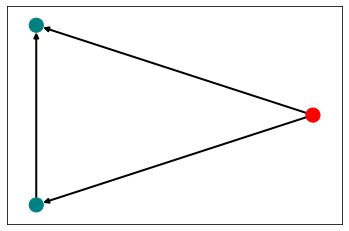

In [20]:
# role_5
f = create_subgraph()

# part of triangles
# k_in = 0

spasevski_filip
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
['Karl_Lauterbach', 'spasevski_filip']


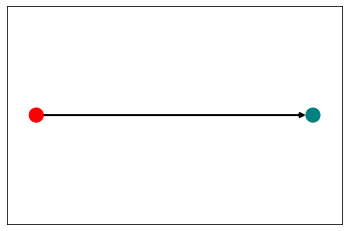

In [21]:
# role_6
h = create_subgraph()

# exactly one outgoing edge
# k_in = 0, k_out = 1
# user mentiones exactly one user

c_lindner
Name: 
Type: DiGraph
Number of nodes: 28
Number of edges: 61
Average in degree:   2.1786
Average out degree:   2.1786
['moritzkoerner', 'MMundelein', 'JBrandenburgFDP', 'salomon_alex', 'florian_toncar', 'KonstantinKuhle', 'fdp', 'th_sattelberger', 'Tobiter2', 'frank_thelen', 'c_jung77', 'Felidae69427721', 'SusaSchneider', 'c_vogt', 'cutwindt', 'sandra_weeser', 'thPichler', 'TomSchreiberMdA', 'MarcoBuschmann', 'sbamueller', 'konopka_p', 'DABornhoeft', 'c_lindner', 'carina_konrad', 'OlliLuksic', 'Lambsdorff', 'daniel_freund', 'Otto_Fricke']


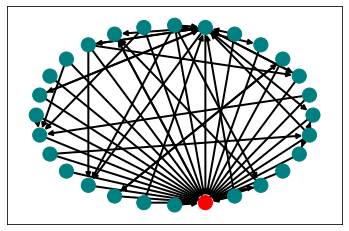

In [22]:
# role_7
i = create_subgraph()

# possibly a clique

### Problems

In [23]:
# roles have been manually verified to best of authors capabilities
# observing features such as average degree, checking neighbouring nodes, etc.
# could be that certain role characteristics are not how author has described
# find a way to verify and exactly pinpoint role characteristics for easier and precise analysis